In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Polynomial and Ploting

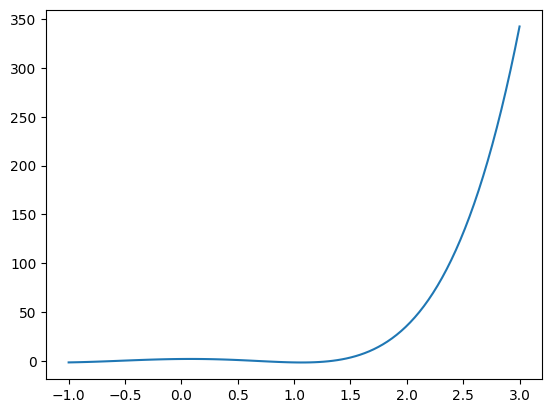

In [2]:

p1= Polynomial([2,1,-6,-2,2.5,1])
x = np.linspace(-1, 3, 100)
y = p1(x)
plt.plot(x, y)
plt.show()



# Derivation  and setting value

Before derivation :
2.0 + 1.0·x - 6.0·x² - 2.0·x³ + 2.5·x⁴ + 1.0·x⁵

After derivation:
1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴


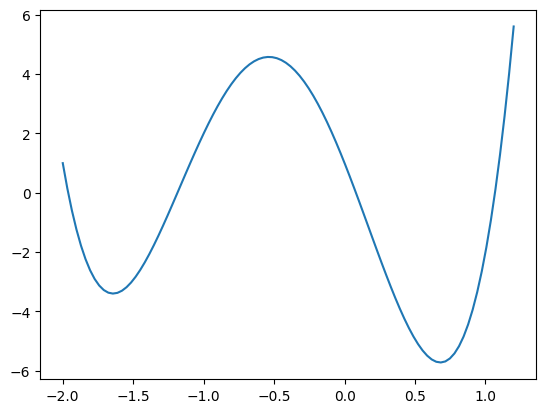

In [3]:
p2 = Polynomial([2,1,-6,-2,2.5,1])
#Slope or Derivative
print(f"Before derivation :\n{p2}\n")
slope_of_p2 = p2.deriv(1)

print("After derivation:")
print(slope_of_p2)

x = np.linspace(-2,1.2,100)
y =  p2.deriv(1)(x)
plt.plot(x,y)
plt.show()



# ** (b)What is the actual slope of f(x) at x=0,−1.18625 ? Print  f′(x)  and plot  f′(x)  at  −2≤x≤1.2 .**

2.0 + 4.0·x - 6.0·x² + 7.0·x³ + 3.0·x⁴


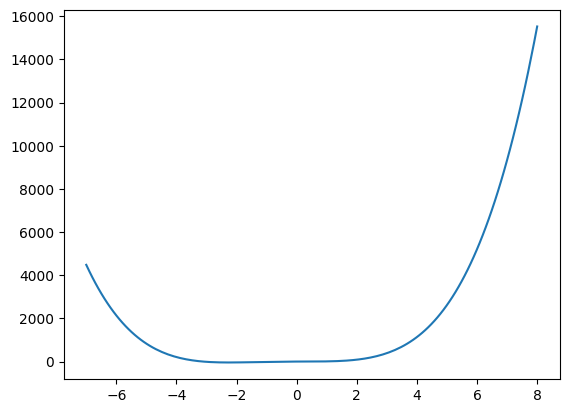

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
new_p = Polynomial([2,4,-6,7,3])
print(new_p)
x = np.linspace(-7,8,150)
y = new_p(x)
plt.plot(x,y)

# Forword Deff

In [5]:
#c,d,e=>  FD, BD, CD at x=0,−1.18625,h = 0.1

def fd (p,x,h):
  return (p(x+h) - p(x))/h
def bd (p,x,h):
  return (p(x) - p(x-h))/h
def cd (p,x,h):
  return (p(x+h) - p(x-h))/(2*h)
poly = Polynomial([2,4,-6,7,3])
h = 0.1
# 0 −1.18625
print(f"FD: {fd(poly,0,h)}")
print(f"FD: {fd(poly,-1.18625,h)}")

FD: 3.4730000000000016
FD: 27.12709932031256


# **divided_diff_table**

In [6]:

def divided_diff_table(x, y):
    n = len(x)                  # number of data points
    coef_y = list(y)
    for i in range(1,n):
      for j in range(n-1,i-1,-1):
        coef_y[j] = (coef_y[j]-coef_y[j-1]) / (x[j]-x[j-i])
    return coef_y

x = [-1, 0, 1, 2]
y = [0.5, 3, 1.5, 8]#coff
coeffs = divided_diff_table(x,y)
print(coeffs)

[0.5, 2.5, -2.0, 2.0]


In [7]:
def newton_eval(x_nodes, coeffs, x_val):
    n = len(coeffs)
    result = coeffs[0]          # start with first coefficient (f[x0])
    product = 1.0
    for i in range(1, n):
        product *= (x_val - x_nodes[i-1])   # build (x - x0)(x - x1)...
        result += coeffs[i] * product       # add coeff * product
    return result

x_nodes = [-1, 0, 1, 2]
# coeffs = [0.5, 3, 1.5, 8]#coff
val_at_7 = newton_eval(x_nodes, coeffs, 7)
print(val_at_7)

580.5


2.874999999999998


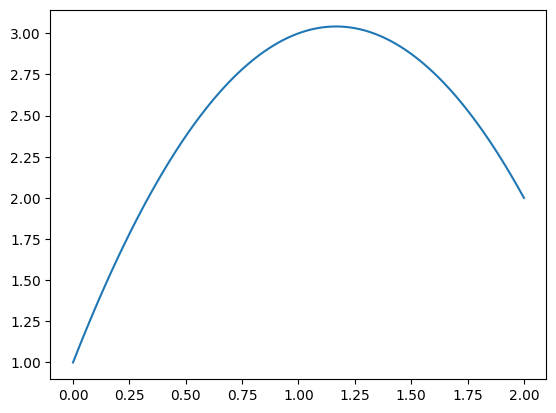

In [8]:
def get_poly(data_x, data_y):
    n = len(data_x)
    X = np.zeros((n, n))              # build Vandermonde matrix
    for i in range(n):
        for j in range(n):
            X[i][j] = data_x[i]**j    # row = powers of xi

    X_inv = np.linalg.pinv(X)         # pseudo-inverse of Vandermonde
    a = np.dot(X_inv, data_y)         # solve for coefficients
    p = Polynomial(a)                 # make polynomial object
    return p
p = get_poly([0, 1, 2], [1, 3, 2])
print(p(1.5))
xx = np.linspace(0, 2, 100)
plt.plot(xx, p(xx))
plt.show()

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[1. 0. 0.]
 [1. 1. 1.]
 [1. 2. 4.]]
[[ 1.00000000e+00 -1.30191319e-15  3.99833655e-16]
 [-1.50000000e+00  2.00000000e+00 -5.00000000e-01]
 [ 5.00000000e-01 -1.00000000e+00  5.00000000e-01]]


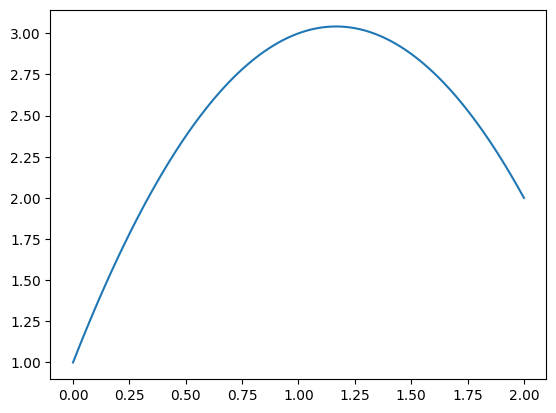

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
data_x = [0,1,2]
data_y = [1,3,2]
n = len(data_x)
zero_mat = np.zeros((n,n))
print(zero_mat)
print()
for row in range(n):
    for col in range(n):
        zero_mat[row][col] = data_x[row] ** col
print(zero_mat)
inv_mat = np.linalg.pinv(zero_mat)
print(inv_mat)
dot_product = np.dot(inv_mat,data_y)

# Step 3: Build polynomial and plot
p = Polynomial(dot_product)
x = np.linspace(0,2,100)
y = p(x)

plt.plot(x,y)
plt.show()





2.874999999999998


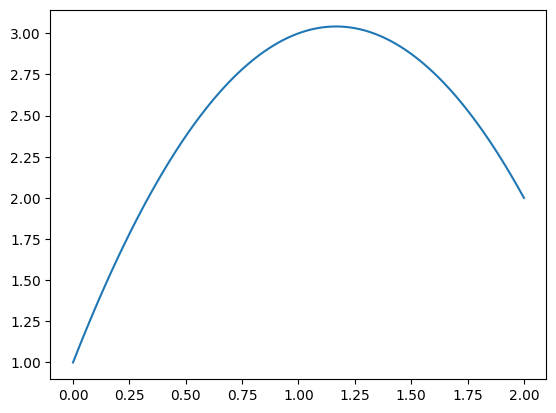

In [10]:
import numpy as np

import matplotlib.pyplot as plt

from numpy.polynomial import Polynomial


data_x = [0,1,2]
data_y = [1,3,2]
matrix = np.zeros((len(data_x),len(data_y)))
# print(matrix)
print()

for i in range (len(data_x)):
  for j in range (len(data_x)):
    matrix[i][j] = (data_x[i]** j)


# print(matrix)
print()

inv_matrix = np.linalg.pinv(matrix)
# print(inv_matrix)
print()

dot_res = np.dot(inv_matrix,data_y)
# print(dot_res)
print()

p = Polynomial(dot_res)
x = np.linspace(0,2,100)
y = p(x)

print(p(1.5))
plt.plot(x, y)
plt.show()


# **Lagrange**

1 2.0


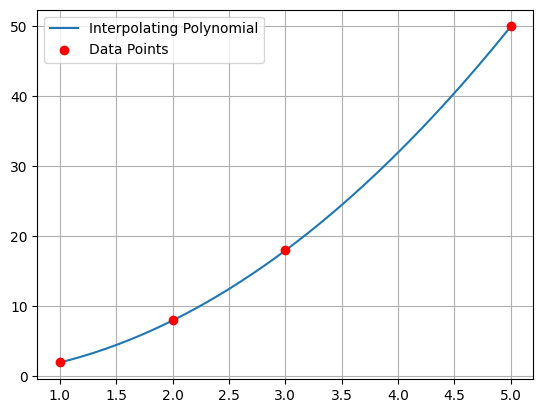

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
X = [1, 2, 3, 5]
Y = [2, 8, 18, 50]
n = len(X)

# Point where you want to evaluate the polynomial
px = 1
py = 0

# Lagrange interpolation function
def lagrange_interpolation(x, X, Y):
    total = 0
    n = len(X)
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - X[j]) / (X[i] - X[j])
        total += Y[i] * L
    return total

# Evaluate at px
py = lagrange_interpolation(px, X, Y)
print(px, py)

# Plotting
x_vals = np.linspace(1, 5, 200)
y_vals = [lagrange_interpolation(x, X, Y) for x in x_vals]

plt.plot(x_vals, y_vals, label="Interpolating Polynomial")
plt.scatter(X, Y, color="red", zorder=5, label="Data Points")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

X = [1,2,3,5]
Y = [2,8,18,50]
n = len(X)

P = Polynomial([0])
for i in range(n):
    Li = Polynomial([1])
    for j in range(n):
        if i != j:

            Li *= Polynomial([-X[j], 1]) / (X[i] - X[j])

    P += Y[i] * Li

print("Interpolating polynomial:", P)

px = 1
py = P(px)
print(f"P({px}) = {py}")


x = np.linspace(1, 5, 200)
y = P(x)
plt.plot(x, y)
f = lambda x: 2*x**2
x_test = 4
true_val = f(x_test)
interp_val = P(x_test)
trunc_error = true_val - interp_val
